__Contextualitzeu els exemples de les següents preguntes respecte al projecte que heu definit a la PAC1. Si ho desitgeu, podeu redefinir o afinar el projecte.__



__Exercici 1__

__Creieu que els models d'agregació són el mètode més adequat per aconseguir els objectius que us havíeu proposat? Justifiqueu la resposta tot raonant-la.
Com podria ser el model resultant?
Doneu un exemple de la interpretació què és podria derivar del model generat.__


Per poder contestar aquesta pregunta adequadament seria interessant poder treballar sobre les dades que vaig considerar al meu projecte, però això no pot ser. Però considerant el tipus de dades que es consideraven al projecte proposat, considero que els models d'agregació representen un mètode adequat per aconseguir els objectius que m'havia proposat, encara que crec que no seria el millor ni molt menys, ja que els arbres de decissió me sembla que és un mètode que s'avé millor amb les dades que té el meu projecte i els objectius que es volen assolir. 

Un fet positiu és que ja sabem des d'un principi que el número de clústers seria 4, que és el número de valors diferents que podia prendre el *target* considerat, el número de filtres de seguretat que es tindrien que obrir.

Tal com vaig comentar a la PAC 3, en el projecte que vaig proposar el que es vol fer és una classificació per poder decidir el número adient de filtres de seguretat que s’han d’obrir, a partir de les dades proporcionades per dos sistemes independents, Scena i Xovis. Hi ha tres atributs de les dades que considero que són molt importants, segurament els més importants de tots: el temps de cues, que proporciona el sistema Xovis, les previsions de passatgers per cada hora, que es tracta d’un atribut que el sistema Scena calcula a partir d’altres atributs, y el número de filtres oberts. Els dos primers actuen com a *features* i el tercer com a *target*, i que en el nostre cas desconeixem. El que hauriem de provar és aplicar els mètodes d'agregació, per exemple el k-NN, sobre les dades que tenim, prenent els atributs *Temps_de_cua* i *Passatgers_previstos* i un número de clústers k=4. Això dividiria el nostre conjunt de dades en 4 clústers. Després hauriem de comprovar, amb dades noves, si la classificació té una qualitat suficient, mirant el percentatge de vegades que encerta. 

El model es podria representar gràficament amb un gràfic bidimensional on en els dos eixos tindriem els dos atributs *features*, *Temps_de_cua* i *Passatgers_previstos*. En el meu projecte m'interessa que els clústers siguin seccions de corones centrades a l'origen, com si agaféssim una diana amb quatre cercles concèntrics i en prenguéssim només un quadrant. Tindriem així 4 zones, diferenciades per la seva distància a l'origen, on cada zona correspondria a un número de filtres diferents, amb 1 filtre corresponent a la secció de corona més propera a l'origen, 2 la següent, 3 la següent i amb 4 filtres la més llunyana. 

Hauria de definir una distància que s'avengui amb aquesta disposició, quina podria ser? Em sembla bastant evident que seria una distància que, entre dos punts, es calcularia calculant primer la distància euclídea de cada punt a l'origen, i calculant després la el valor absolut de la diferència entre aquests dos valors. Els eixos haurien d'estar normalitzats. D'aquesta manera es podrien definir 4 clústers concèntrics amb centre a l'origen. 

__Exercici 2__

__En aquest exercici aneu a seguir els passos del cicle de vida d'un projecte de mineria de dades pel cas d'un algorisme d'agregació i més concretament d'un clúster amb l'algorisme kmeans.  Ho fareu amb el fitxer Assegurances2.csv. Que trobareu a la wiki. Aquest fitxer conté un registre per cada incident que gestiona una companyia d'assegurances. Aquests incidents estan caracteritzats per variables de negoci: cost, potència, antiguitat del cotxe i sociodemogràfiques: sexe edat de l'assegurat.__

__•	Estudieu i compreneu les dades, per exemple: Número de registres dels fitxer? Distribucions de valors per variables? Hi ha camps mal informats o buits?__

Per començar, especifico la ruta al directori de treball. A continuació carrego el fitxer *Assegurances2.csv* a l’entorn de R, en un dataframe amb nom *assegurances2*. Comprovo que s’ha carregat correctament amb la funció *head*(), que mostra en consola les primeres files del fitxer.

In [254]:
setwd("C:/Users/Lluís/Documents/UOC/Màster en Data Science/Mineria de Dades/PAC 4")
assegurances2 <- read.csv(file="Assegurances2.csv", header=TRUE, sep=";")
head(assegurances2)

Numero.incident,Sexe..1.1.0.D.,Edat,Anys.cotxe,Caballs,Costos
5126419,1,46,6,110,2436.86
9915975,1,77,3,100,1322.65
1250208,0,24,10,50,6871.83
1332233,0,50,11,70,1652.94
2558883,1,40,15,50,1495.18
2862115,0,56,9,102,2018.52


Veiem que s'ha carregat correctament. Passo a mirar les dimensions del dataframe *assegurances2*:

In [255]:
dim(assegurances2)

[1] 498   6

Aquest resultat ens diu que el dataframe *assegurances2* té 498 files i 6 columnes, és a dir, que té 498 registres i hi ha 6 atributs. Anem a veure ara la distribució de les variables, amb la funció *summary()*:

In [256]:
summary(assegurances2)

 Numero.incident   Sexe..1.1.0.D.        Edat         Anys.cotxe    
 Min.   :1001809   Min.   :0.0000   Min.   :18.00   Min.   : 0.000  
 1st Qu.:3369286   1st Qu.:0.0000   1st Qu.:30.00   1st Qu.: 5.000  
 Median :5337270   Median :1.0000   Median :43.00   Median :10.000  
 Mean   :5422967   Mean   :0.5442   Mean   :44.06   Mean   : 9.896  
 3rd Qu.:7412620   3rd Qu.:1.0000   3rd Qu.:57.00   3rd Qu.:15.000  
 Max.   :9971262   Max.   :1.0000   Max.   :77.00   Max.   :19.000  
    Caballs           Costos        
 Min.   : 30.00   Min.   :   812.6  
 1st Qu.: 49.00   1st Qu.:  1586.2  
 Median : 58.00   Median :  2136.3  
 Mean   : 79.68   Mean   :  7956.0  
 3rd Qu.:100.00   3rd Qu.:  6867.3  
 Max.   :354.00   Max.   :297127.5  

La funció *summary()* ens ofereix informació estadística de les variables. Veiem que totes les variables són numèriques i no hi ha camps mal informats ni buits, ja que en cap de les 6 variables hi apareixen NAs.

__•	Prepareu les dades. En aquest cas ja estan en el format correcte i no cal discretitzar ni generar atributs nous. Observeu, però que hi ha un fitxer Assegurances.csv. Aquest és el fitxer mestre d'on s'ha generat el 2. Fixeu-vos que s'han preparat les dades per poder aplicar l'algorisme. És important que ho reviseu perquè us donarà pistes cara l'exercici 3.__

Anem a carregar les dades del fitxer *Assegurances.csv* en el dataframe *assegurances*, mirem quines dimensions té, visualitzem les primeres files i anem a veure la distribució de les variables amb la funció *summary()*:

In [257]:
assegurances <- read.csv(file="Assegurances.csv", header=TRUE, sep=";")
dim(assegurances)
head(assegurances)
summary(assegurances)

[1] 506  18

ID.Assegurat,Sexe,Data.naixement,Edat,Obligatori,Tot.risc,Vidres,Incendi,Us,Any.compra.cotxe,Anys.cotxe,Model,Cubicatge,Caballs,Color,Data.adquisicio,Numero.incident,Costos
15.760,H,20/07/1956,46,Sí,Sí,No,No,Particular,1996,6,19,1600,110,ROJO,13/01/1996,5.126.419,2436.86
15.997,H,15/04/1925,77,Sí,Sí,No,No,Particular,1999,3,35,2000tdi,100,ROJO,03/06/1999,9.915.975,1322.65
16.230,M,14/07/1978,24,Sí,No,Sí,Sí,Particular,1991,10,10,1100,50,BLANCO,03/12/1991,1.250.208,6871.83
16.500,M,22/12/1951,50,Sí,No,Sí,Sí,Particular,1990,11,3,1300,70,BLANCO,20/12/1990,1.332.233,1652.94
17.396,H,28/05/1962,40,Sí,No,Sí,Sí,Particular,1986,15,10,1100,50,ROJO,17/12/1986,2.558.883,1495.18
17.982,M,27/11/1945,56,Sí,No,Sí,Sí,Particular,1993,9,37,2000,102,BLANCO,20/10/1993,2.862.115,2018.52


  ID.Assegurat       Sexe       Data.naixement      Edat       Obligatori
 Min.   :    15.76    :  1   12/02/1969:  3    Min.   :18.00     :  1    
 1st Qu.:    67.25   H:274   02/04/1968:  2    1st Qu.:30.00   Sí:505    
 Median :   138.96   M:231   05/03/1945:  2    Median :43.00             
 Mean   :   627.02           07/06/1947:  2    Mean   :44.15             
 3rd Qu.:   197.31           08/02/1947:  2    3rd Qu.:57.00             
 Max.   :249357.00           11/07/1972:  2    Max.   :77.00             
 NA's   :1                   (Other)   :493    NA's   :1                 
 Tot.risc Vidres   Incendi           Us      Any.compra.cotxe   Anys.cotxe    
   :  1     :  1     :  1             :  1   Min.   :1983     Min.   : 0.000  
 No:340   No:165   No:165   Industrial: 12   1st Qu.:1987     1st Qu.: 5.000  
 Sí:165   Sí:340   Sí:340   Particular:493   Median :1992     Median :10.000  
                                             Mean   :1992     Mean   : 9.931  
             

Veiem que en les dades originals a partir de les quals s'han construit les dades que tenim a *assegurances2* hi ha 506 files en comptes de 498, i hi ha 18 atributs en comptes de 6. També veiem que en alguns casos, per alguns atributs hi apareix un NA. Anem a veure si hi ha files repetides:

In [258]:
dim(unique(assegurances))

[1] 506  18

No ens apareixen files repetides, però tal vegada sí que en tenim si només considerem els 6 atributs que hi ha a *assegurances2*. Anem a comprovar-ho:

In [259]:
dim(unique(subset(assegurances, select=c('Numero.incident', 'Sexe', 'Edat', 'Anys.cotxe', 'Caballs', 'Costos'))))

[1] 506   6

Doncs no, seguim tenint 506 files diferents. Bé, com que no sabem ben bé quines són les transformacions que s'han fet sobre les variables per passar de les dades originals a les dades transformades, no podem sebre exactament el motiu pel que s'han eliminat algunes files.

El que sí que podem veure són algunes de les transformacions que s'han fet. Per exemple, l'atribut *Sexe* passa de venir expressat pel conjunt ['H', 'M'] a ser-ho pel conjunt [1, 0].

__•	Instal•leu, si manca, el paquet stats a R. Aquest paquet, documentat a la wiki conté una implementació de l'algorisme kmeans vist al Mòdul Docent. És una implementació senzilla per poder contrastar el vist a la teoria. R conté implementacions de clúster molt potents però millor treballar quelcom senzill i comprensible.  Amb aquest paquet genereu un model de mineria. Observareu que el nombre clústers a generar el marquem nosaltres. Cal anar provant  amb diferents nombres de particions fins que ens trobem satisfets del resultat. Els criteris poden ser la homogeneïtat de les particions, però també la lectura dels clústers resultants i si són molt semblants o diferents...__

__• Genereu un model d'agregació.__

__• Quina és la qualitat del model?__

__• Dibuixeu gràficament els clústers__

__• En funció del model, quin és el coneixement que treiem?__


Instal·lem el paquet *stats*:

In [260]:
install.packages('stats', repos='http://cran.us.r-project.org')

Warning message:
"package 'stats' is not available (for R version 3.4.2)"Warning message:
"package 'stats' is a base package, and should not be updated"

Anem a aplicar l'algoritme *kmeans*. Com que el número de clústers el triem nosaltres, començo amb 2 clústers:

In [261]:
n = 2
km <- kmeans(assegurances2, n)
print(km)

K-means clustering with 2 clusters of sizes 258, 240

Cluster means:
  Numero.incident Sexe..1.1.0.D.     Edat Anys.cotxe  Caballs   Costos
1         3380461      0.5271318 43.46124  10.120155 79.37209 7673.790
2         7618660      0.5625000 44.69583   9.654167 80.00417 8259.332

Clustering vector:
  [1] 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 2 2 2 2 1 1 2
 [38] 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2
 [75] 1 2 1 1 1 2 2 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 1 1 1 2 2 1 2 2 1 1 2 2 2 2 2
[112] 1 1 1 2 1 1 2 2 1 1 1 1 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 1 2 1 1 1 1 1 2 1 2
[149] 2 2 2 2 1 1 2 1 1 1 1 1 2 2 1 2 2 2 1 1 1 2 1 2 2 1 1 2 2 2 1 2 1 2 1 2 2
[186] 2 2 2 1 1 2 1 1 2 2 2 1 2 1 1 2 1 1 1 2 1 1 1 2 2 1 2 1 2 1 1 2 2 1 1 2 1
[223] 1 1 1 2 2 2 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 1 1 2 2 2 1 1 1 1 1 2 1 2 1 1 2
[260] 1 2 2 1 1 1 2 1 2 1 1 2 2 1 1 2 1 2 2 2 2 2 1 2 2 1 2 1 2 1 1 2 1 1 1 1 1
[297] 2 1 1 1 2 1 2 1 2 1 1 2 1 2 2 2 2 2 2 2 1 1 2 2 2 1 

Ens apareix informació sobre els resultats. Primer, ens diu que s'han creat dos clústers, amb mides 258 i 240. També apareix una taula amb les posicions dels centres dels clústers, calculats a partir de les mitjanes dels punts que formen part de cada clúster. Després hi apareix un vector d'enters que indica el clúster en el qual es localitza cada punt. A continuació es mostra la suma dels quadrats dels punts per a cada clúster, i es calcula el quocient entre la suma dels quadrats entre clústers i la suma total de quadrats i es dóna aquest valor en percentatge. Precisament aquest valor és el que representa la qualitat del model. Finalment, se'ns recorda que aquestes diferents informacions es poden obtenir de manera individual. 

Passem a estudiar el cas en que el número de clústers sigui 2. Abans ja hem mostrat els components del resultat obtingut; ara representarem gràficament els clústers i els seus centres:

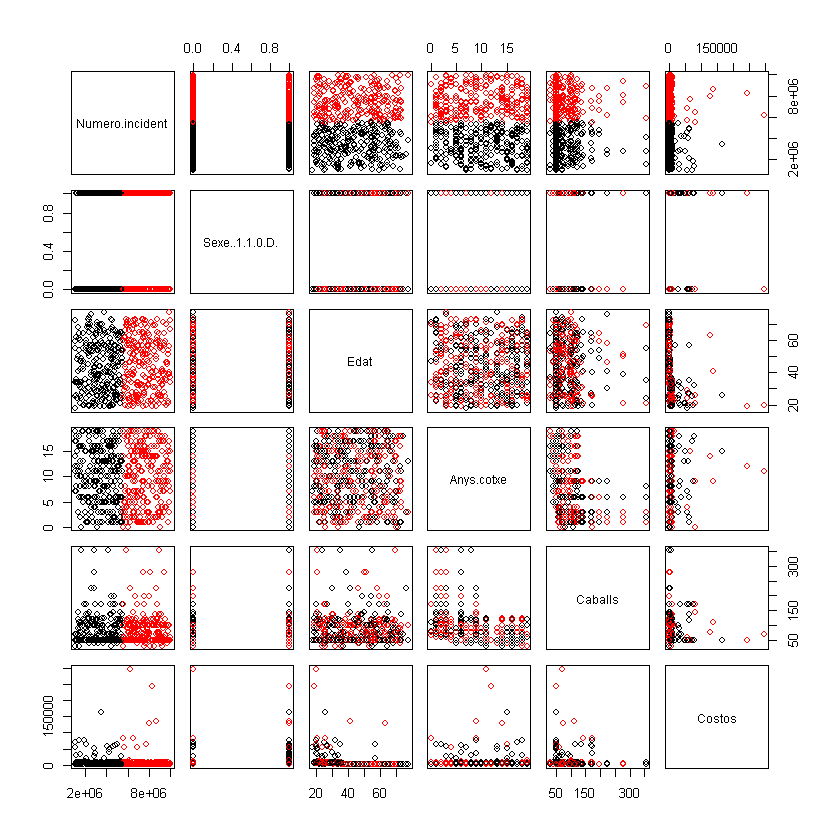

In [262]:
plot(assegurances2, col = km$cluster)
points(km$centers, col = 1:n, pch = 8)

Si mirem la taula de les mitjanes dels clústers, veiem que en l'atribut *Numero.incident* hi ha molta distància entre els dos clústers, fet que no es dóna en cap altre atribut, en els que els centres estan molt propers. Això també ho veiem en observar les gràfiques, ja que es veu com per l'atribut *Numero.incident* les dades es veuen molt ben separades en dos conjunts però en la resta d'atributs es veuen molt barrejades, sense observar-se cap mena de clústers. Això el que ens diu és que els dos clústers que s'han format ho han fet gairebé només tenint en compte com element diferenciador l'atribut *Numero.incident*, on per valors baixos d'aquest atribut els punts es troben en un clúster i per valors alts es troben a l'altre clúster. El valor de la qualitat del model és 73.3%.

Passem ara a mirar el cas en que considerem 3 clústers:

K-means clustering with 3 clusters of sizes 184, 154, 160

Cluster means:
  Numero.incident Sexe..1.1.0.D.     Edat Anys.cotxe  Caballs   Costos
1         5437554      0.5489130 44.30435   9.510870 79.33152 8432.639
2         8382621      0.5519481 44.37662   9.909091 79.62987 7275.698
3         2557523      0.5312500 43.46250  10.325000 80.11875 8062.592

Clustering vector:
  [1] 1 2 3 3 3 3 1 3 1 3 3 3 2 2 3 1 2 3 1 2 1 3 3 2 3 3 1 1 1 1 2 1 1 1 1 1 2
 [38] 1 1 2 3 1 3 1 2 1 2 3 1 1 2 3 3 3 1 3 1 1 1 1 1 1 2 3 1 1 2 2 2 3 2 2 1 2
 [75] 3 2 1 3 1 2 1 1 1 3 3 3 1 2 2 2 3 1 1 2 2 2 1 3 3 2 2 1 2 1 3 3 2 2 2 2 1
[112] 3 3 3 2 3 3 2 1 1 1 3 3 1 3 1 2 2 1 1 2 1 1 1 2 2 1 1 3 2 3 3 3 1 1 1 3 2
[149] 2 2 2 2 3 3 1 1 3 1 3 3 1 1 1 1 2 1 3 3 3 1 3 2 1 1 1 1 2 1 3 1 1 2 3 2 1
[186] 1 2 1 1 3 2 1 3 1 2 1 3 1 1 3 2 1 3 3 2 3 3 1 1 2 1 2 3 2 1 1 2 1 3 3 2 1
[223] 3 3 3 1 1 1 3 3 2 1 2 3 2 2 3 1 2 1 3 1 2 3 1 2 1 2 3 3 1 3 1 2 3 2 3 3 1
[260] 3 2 1 1 3 3 1 3 1 3 3 2 2 1 1 2 1 2 1 2 2 1 3 1 2 3 2 3 

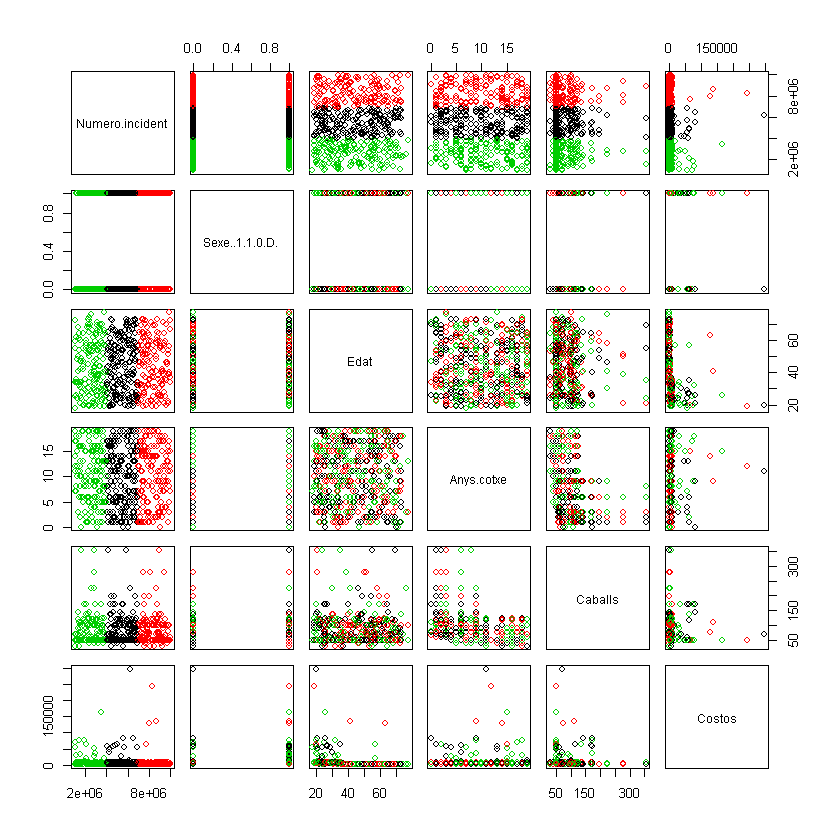

In [263]:
n = 3
km <- kmeans(assegurances2, n)
print(km)
plot(assegurances2, col = km$cluster)
points(km$centers, col = 1:n, pch = 8)

Pel cas amb 3 clústers es dóna una situació idèntica al cas amb 2 clústers, amb molta distància per l'atribut *Numero.incident* i gairebé no n´hi ha als altres atributs. Ara la qualitat és 87.4%.

Passem a veure el cas amb 4 clústers:

K-means clustering with 4 clusters of sizes 102, 138, 123, 135

Cluster means:
  Numero.incident Sexe..1.1.0.D.     Edat Anys.cotxe  Caballs   Costos
1         8910006      0.5294118 43.76471   9.725490 79.64706 8401.770
2         4450883      0.5362319 43.02174   9.717391 76.02174 7968.226
3         2232291      0.5203252 43.86179  10.463415 83.78862 7914.353
4         6689060      0.5851852 45.51111   9.688889 79.68889 7644.567

Clustering vector:
  [1] 2 1 3 3 3 3 2 3 2 3 3 3 1 4 3 2 1 2 2 4 2 3 3 1 3 2 2 2 4 2 4 4 4 2 2 2 4
 [38] 2 2 1 3 4 3 2 4 4 1 2 2 2 1 3 3 3 4 3 2 2 4 4 4 2 1 3 4 4 4 4 4 2 1 4 4 1
 [75] 3 4 2 2 2 1 4 2 2 2 3 3 4 1 1 1 3 4 2 4 4 1 2 3 2 4 1 2 1 4 3 2 1 1 1 1 4
[112] 3 3 2 1 3 3 1 4 2 2 3 3 4 3 4 4 1 4 2 1 4 2 4 4 1 4 4 3 4 3 2 2 2 2 4 3 1
[149] 1 4 4 1 2 3 4 2 2 2 3 3 4 4 2 4 4 4 3 3 3 2 3 1 4 2 2 4 1 4 2 4 2 1 2 1 4
[186] 4 4 4 2 3 1 2 2 4 1 4 2 4 2 3 1 2 3 3 1 2 2 2 4 1 2 1 2 1 2 2 1 4 3 3 4 2
[223] 3 3 3 4 4 4 3 3 1 2 4 2 4 1 2 2 4 2 3 2 4 3 2 1 4 1 2 3 2 3 

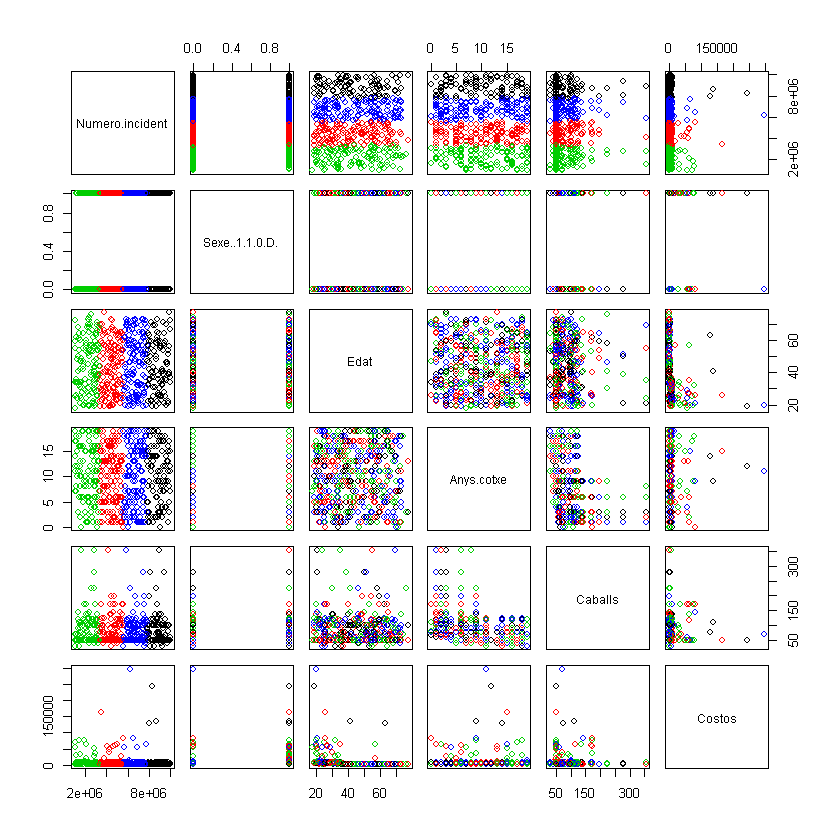

In [264]:
n = 4
km <- kmeans(assegurances2, n)
print(km)
plot(assegurances2, col = km$cluster)
points(km$centers, col = 1:n, pch = 8)

Situació una altre vegada idèntica. Ara el valor de la qualitat és de 93.2%.

Passem a veure el cas per 5 clústers:

K-means clustering with 5 clusters of sizes 100, 117, 119, 77, 85

Cluster means:
  Numero.incident Sexe..1.1.0.D.     Edat Anys.cotxe  Caballs   Costos
1         5996497      0.5800000 46.09000    9.05000 83.32000 8655.424
2         4222220      0.5470085 43.05983   10.00855 71.77778 7849.559
3         2196634      0.5126050 43.47899   10.40336 85.01681 8118.599
4         9194584      0.4805195 43.38961    9.61039 78.70130 5396.428
5         7501242      0.6000000 44.44706   10.28235 79.67059 9370.571

Clustering vector:
  [1] 1 4 3 3 3 3 2 2 2 3 3 3 4 5 3 2 4 2 2 5 2 3 3 5 3 2 2 1 1 2 5 1 1 1 2 2 5
 [38] 2 2 4 3 1 3 2 5 1 4 2 2 1 5 3 3 3 1 3 1 2 1 1 1 2 4 3 1 1 5 5 5 2 4 5 1 4
 [75] 3 5 1 2 2 4 1 2 2 2 3 3 1 5 4 4 3 1 2 5 5 5 2 3 2 5 4 2 5 1 3 2 4 4 4 4 5
[112] 3 3 2 4 3 3 4 1 1 2 3 3 1 3 1 5 4 1 2 4 1 2 1 5 5 1 1 3 5 3 2 2 2 1 5 3 4
[149] 4 5 5 5 2 3 1 1 2 2 3 3 1 5 2 5 5 5 3 3 3 1 3 5 1 2 1 1 4 1 2 1 1 5 2 4 1
[186] 1 5 1 2 3 4 2 2 1 4 1 2 1 2 3 4 2 3 3 4 2 2 1 1 4 2 4 2 4 2 2 4 1 

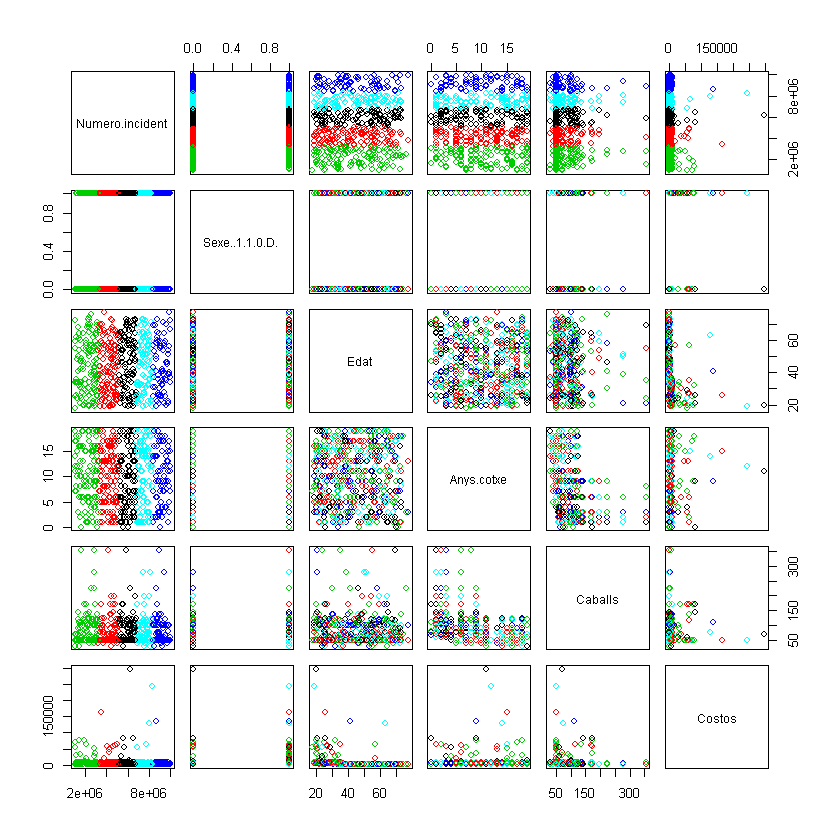

In [265]:
n = 5
km <- kmeans(assegurances2, n)
print(km)
plot(assegurances2, col = km$cluster)
points(km$centers, col = 1:n, pch = 8)

Situació anàlega a les anteriors.

Podriem continuar provant valors més alts pel número de clústers, però ja veiem que l'únic atribut que discrimina de manera notòria els diferents clústers és sempre el mateix i només un, *Numero.incident*.

Ara miraré com va variant el factor de qualitat a mesura que puja el número de clústers:

In [266]:
quality <- c(0)
for (n in seq(2, 20)) {
    km <- kmeans(assegurances2, n) 
    res = c(n, km$betweenss / km$totss)
    quality[n] <- km$betweenss / km$totss
    print(res)
    }

[1] 2.0000000 0.7332335
[1] 3.0000000 0.8741898
[1] 4.0000000 0.9321445
[1] 5.0000000 0.9527204
[1] 6.0000000 0.9710218
[1] 7.0000000 0.9759391
[1] 8.0000000 0.9809944
[1] 9.0000000 0.9854614
[1] 10.0000000  0.9887558
[1] 11.000000  0.991293
[1] 12.0000000  0.9924757
[1] 13.0000000  0.9918198
[1] 14.0000000  0.9945704
[1] 15.0000000  0.9938343
[1] 16.0000000  0.9948996
[1] 17.0000000  0.9962399
[1] 18.0000000  0.9963015
[1] 19.0000000  0.9968845
[1] 20.0000000  0.9965161


I, si ho representem gràficament, obtenim:

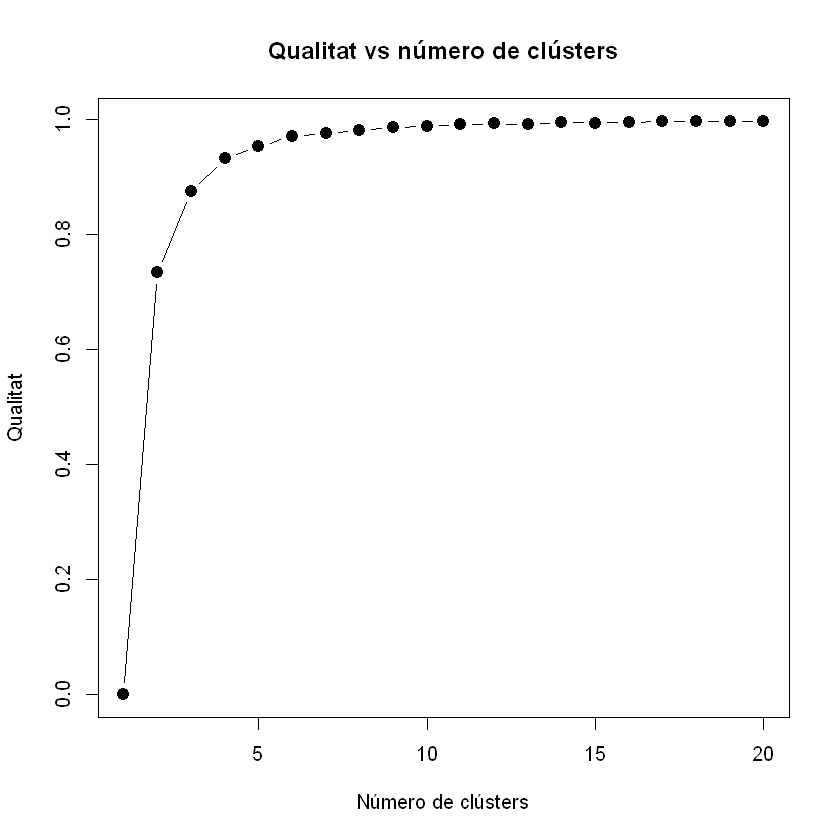

In [267]:
plot(1:20, quality, type='b', 
     xlab='Número de clústers',
     ylab='Qualitat',
     main='Qualitat vs número de clústers',
     pch=20, cex=2)

Veiem que puja a mesura que puja el valor del número de clústers, primer molt depresa i després, a partir d'uns 4 clústers, ho fa molt a poc a poc. 

Buscant pels llibres que tinc sobre Data Science he trobat un mètode per trobar el número òptim de clústers, que es diu el __mètode del colze__. Resulta que la suma de quadrats dintre dels grups, que en alguns llibres anomenen __inèrcia__, i que dit d'una altra manera és la suma de totes les diferències entre cada membre del clúster i el seu centroide, tendeix a decreixer amb cada successiu increment del número de clústers, és a dir, quan comparem la inèrcia de diferents clústers podem observar que com més clústers hi ha menor és la inèrcia. Així, el que fem és comparar la inèrcia d'un clúster amb la dels clústers anteriors. Aquesta comparació ens ofereix la tasa de canvi. De manera simplificada, s'identifica el número òptim de clústers fixant-nos en la representació gràfica de la inèrcia en funció del número de clústers, un cop que apareix un colze a la representació gràfica, és a dir, quan els valors deixen de caure ràpidament. Aquesta localització no és molt objectiva i depen bastant del criteri de l'observador.

Passem a veure-ho pel nostre cas:

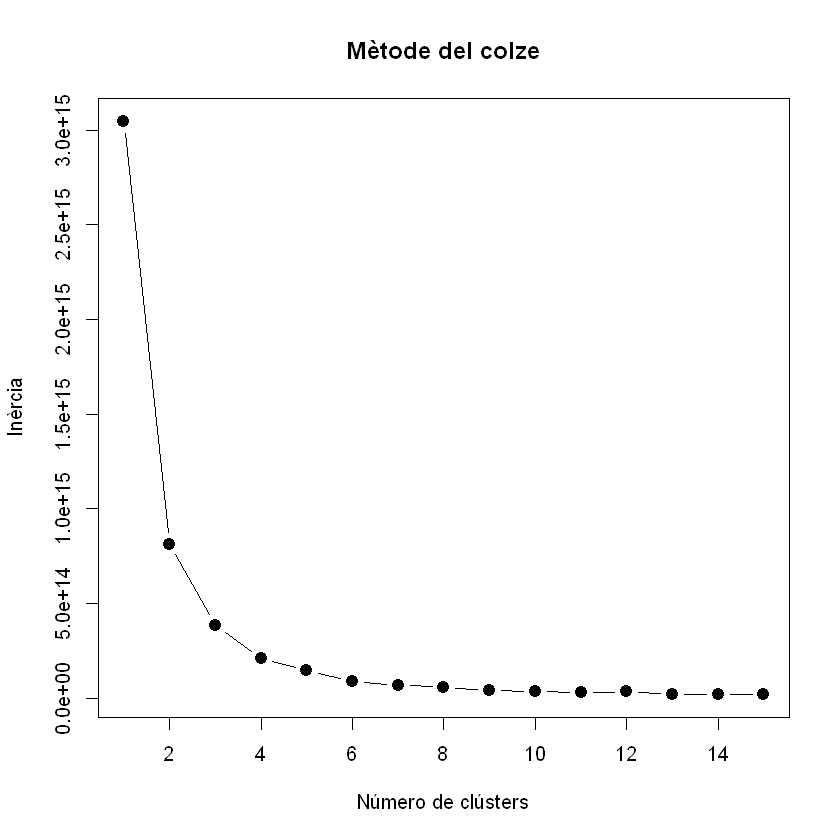

In [268]:
# Calculem el primer valor per la inèrcia, que correspon a un sol clúster, i 
# l'emmagatzemem a la variable inercia.
inercia <- (nrow(assegurances2) - 1) * sum(apply(assegurances2, 2, var))

# Calculem els valors per la inèrcia pels casos en que el número de clústers és entre 2 i 15.
for (i in 2:15) {
    km <- kmeans(assegurances2, centers=i)
    inercia[i] <- sum(km$withinss)
}

# Representem gràficament la inèrcia en funció del número de clústers.
plot(1:15, inercia, type='b', 
     xlab='Número de clústers',
     ylab='Inèrcia',
     main='Mètode del colze',
     pch=20, cex=2)

Per tant, una inspecció de la gràfica ens permet dir que el colze apareix al voltant de 4 clústers, i per tant podem deduir que el número òptim de clústers serà de 4. A més, veiem que aquesta gràfica sembla el negatiu de la gràfica del factor de qualitat en funció del número de clústers. Pel que he pogut trobar en la bibliografia consultada, el mètode del colze es pot emprar a partir de qualsevol de les dues gràfiques. Si es fa servir el factor de qualitat, he trobat en la bibliografia que d'una manera aproximada es pot considerar que el número de clústers adient es troba considerant el darrer valor del factor de qualitat que no sobrepassa el 90%, aproximadament. Podem veure que seguint aquest criteri el número de clústers adient és de 3, que, tiguent en compte que es tracta de valors aproximats, és compatible amb un número de clústers igual a 4 trobat anteriorment considerant la inèrcia.

__3. Repetiu l’exercici 2 amb algun altre conjunt de dades. Poden ser dades reals del vostre àmbit laboral o d’algun repositori de dades a Internet. Mireu per exemple: http://www.ics.uci.edu/~mlearn/MLSummary.html
Seguiu el guió proposat a la pregunta anterior. Podeu afegir nous punts i provar d'altres implementacions de l'algorisme. Per exemple fora interessant que el nombre de particions el proposés l'algorisme. Recordeu també que el cicle de vida dels projectes de mineria contempla retrocedir per tornar a generar el model amb dades modificades o paràmetres de l'algorisme variats si el resultat no és prou bo.__

Per fer aquest exercici m'hauria agradat poder fer servir dades originals dels sistemes Xovis i Scena que he anat plantejant com a projecte al llarg de les anteriors PACs, però aquestes dades són d'accés restringit i no considero lícit fer-les servir, ja que és il·legal fer-les servir per tasques al·liennes al meu treball a l'aeroport de Menorca. Per tant, faré servir unes altres dades, de caràcter públic. Trio fer servir les mateixes dades que vag fer  servir a la PAC 3, el conjunt *iris*, que a més no fa falta carregar ja que ja estan carregades a l'entorn de R.

Primer de tot anem a veure les primeres files d'aquest conjunt de dades:

In [269]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Hi ha 5 atributs, on els 4 primers són els *features*, que són les variables que s'utilitzaran per construir el model, i el *target*, que seria la variable que classifica. En el nostre cas el *target* és el camp *Species*, que en principi per nosaltres hauria de ser desconegut, i per això mateix construiré un altre dataframe igual però sense l'atribut *Species*:

In [270]:
iris2 = subset(iris, select=c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'))
head(iris2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


En aquest exemple ja sabem que el número de clústers adient és 3, però anem a simular que no ho sabem. El que podem fer és representar gràficament el diagrama per visualitzar la inèrcia en funció del número de clústers, per veure quin número de clústers deduiriem a partir de la localització del colze:

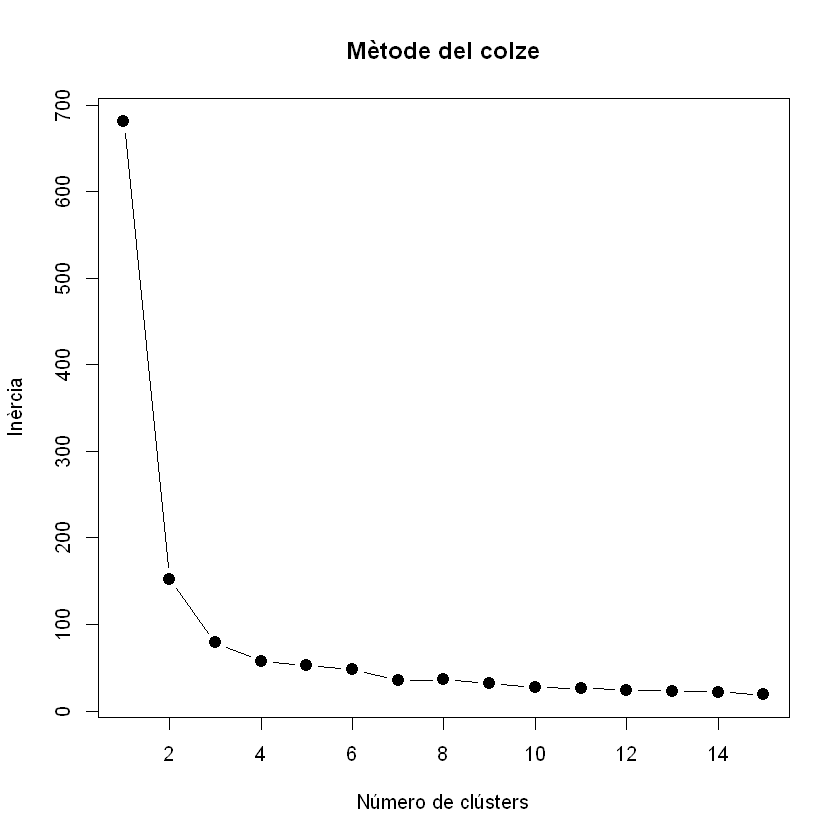

In [271]:
# Calculem el primer valor per la inèrcia, que correspon a un sol clúster, i 
# l'emmagatzemem a la variable inercia.
inercia <- (nrow(iris2) - 1) * sum(apply(iris2, 2, var))

# Calculem els valors per la inèrcia pels casos en que el número de clústers és entre 2 i 15.
for (i in 2:15) {
    km <- kmeans(iris2, centers=i)
    inercia[i] <- sum(km$withinss)
}

# Representem gràficament la inèrcia en funció del número de clústers.
plot(1:15, inercia, type='b', 
     xlab='Número de clústers',
     ylab='Inèrcia',
     main='Mètode del colze',
     pch=20, cex=2)

Efectivament, podem veure com el colze es troba al número de clústers igual a 3. Anem a veure-ho ara a partir de la representació del factor de qualitat:



[1] 2.0000000 0.7764096
[1] 3.0000000 0.8842753
[1] 4.0000000 0.9159553
[1] 5.0000000 0.9268207
[1] 6.0000000 0.9427037
[1] 7.0000000 0.9447243
[1] 8.00000 0.94658
[1] 9.0000000 0.9533078
[1] 10.0000000  0.9494004
[1] 11.0000000  0.9558102
[1] 12.0000000  0.9648246
[1] 13.0000000  0.9618138
[1] 14.0000000  0.9690518
[1] 15.0000000  0.9637054
[1] 16.0000000  0.9710895
[1] 17.0000000  0.9730099
[1] 18.0000000  0.9759908
[1] 19.0000000  0.9739836
[1] 20.000000  0.976059


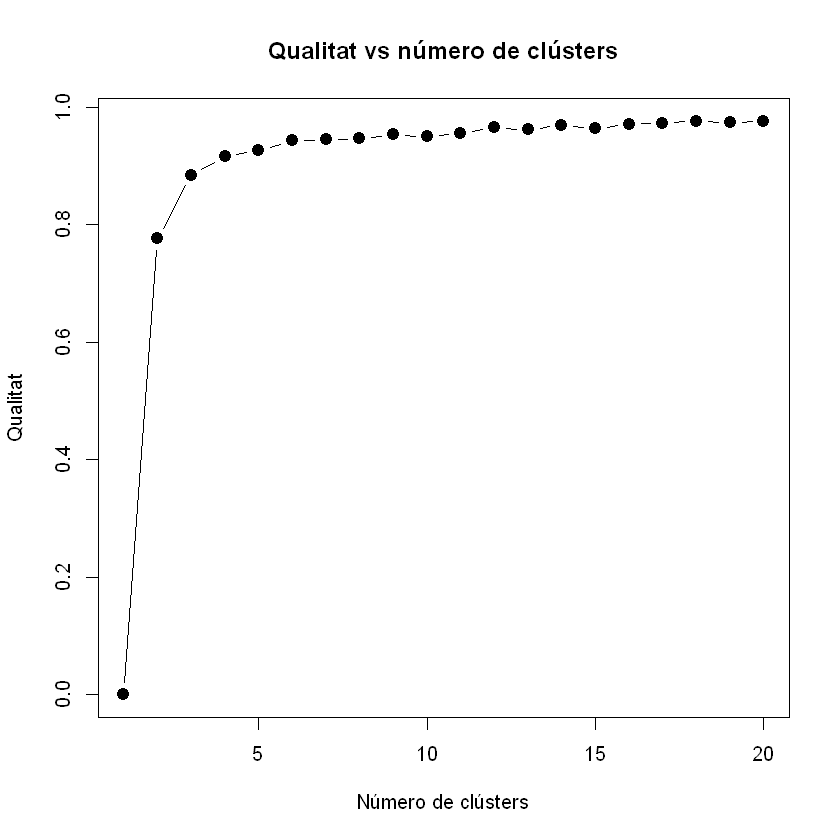

In [272]:
quality <- c(0)
for (n in seq(2, 20)) {
    km <- kmeans(iris2, n) 
    res = c(n, km$betweenss / km$totss)
    quality[n] <- km$betweenss / km$totss
    print(res)
}
plot(1:20, quality, type='b', 
     xlab='Número de clústers',
     ylab='Qualitat',
     main='Qualitat vs número de clústers',
     pch=20, cex=2)

Efectivament, aplicant el criteri del 90% obtenim que el número de clústers adient és de 3, encara que també podriem considerar vàlid el valor de 2. 

El que podem fer ara és automatitzar la cerca d'aquest número de clústers adient, per després aplicar-lo a l'estudi de l'aplicació del mètode k-means:

In [273]:
num_clusters <- 1
n <- 2
quality <- 0
while (quality < 90) {
    km <- kmeans(iris2, n) 
    quality <- 100 * km$betweenss / km$totss
    num_clusters <- n - 1
    n <- n + 1
}
print(num_clusters)

[1] 4


Anem a veure, doncs, els resultats pel cas en que el número de clústers és igual al valor que hem trobat:

K-means clustering with 4 clusters of sizes 62, 28, 22, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548   1.4338710
2     5.242857    3.667857     1.500000   0.2821429
3     4.704545    3.122727     1.413636   0.2000000
4     6.850000    3.073684     5.742105   2.0710526

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   3   3   3   2   2   3   2   3   3   2   3   3   3   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   3   2   3   3   2   2   2   3   3   2   2   2   3   3   2   2   3   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   3   3   2   2   3   2   3   2   3   1   1   4   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   4   1   

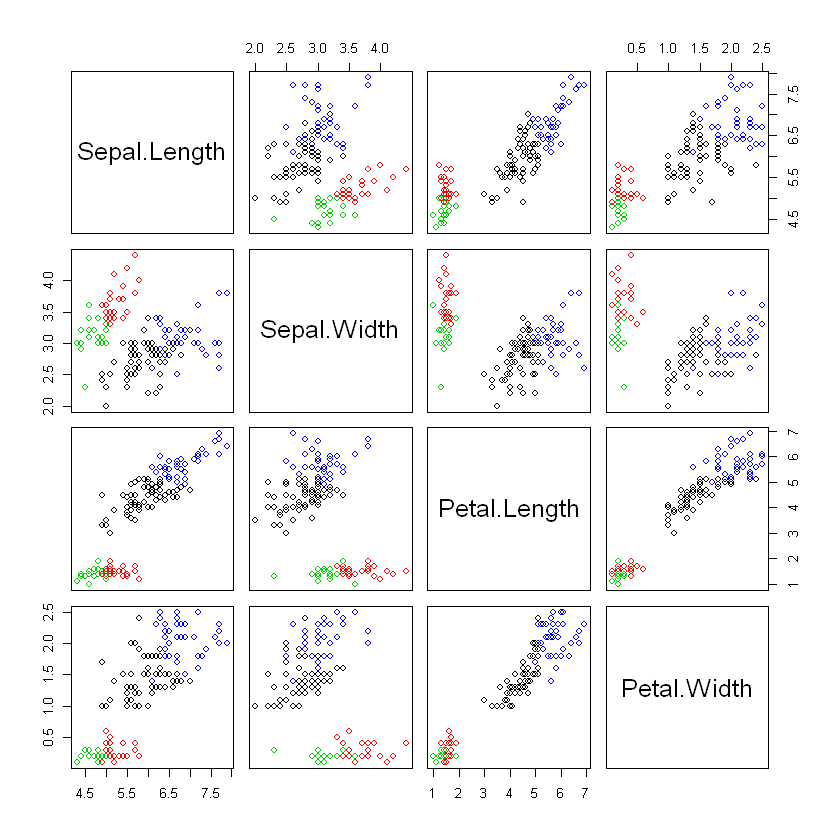

In [274]:
km <- kmeans(iris2, num_clusters)
print(km)
plot(iris2, col = km$cluster)
points(km$centers, col = 1:num_clusters, pch = 8)

En aquest cas, pel conjunt *iris*, veiem com els clústers que es generen són clarament distingibles. També veiem com hi ha parells d'atributs amb els quals els tres clústers es separen molt bé, com per exemple amb *Sepal.Length* i *Petal.Length*.

Fixem-nos amb el *clustering vector*:

In [275]:
print(km$cluster)

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   3   3   3   2   2   3   2   3   3   2   3   3   3   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   3   2   3   3   2   2   2   3   3   2   2   2   3   3   2   2   3   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   3   3   2   2   3   2   3   2   3   1   1   4   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   4   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  4   1   4   4   4   4   1   4   4   4   4   4   4   1   1   4   4   4   4   1 
121 122 123 124 125 126 127 

A la PAC 3 vam veure com el conjunt *iris* està ordenat de tal manera que de les 150 files, les 50 primeres corresponen a un tipus de flor, les 50 següents a un altre i les 50 darreres a un altre. Veiem a simple vista que els 3 clústers trobats segueixen bastant fidelment aquesta tendència. Anem a veure-ho millor:

In [276]:
iris_clusters <- data.frame(km$cluster)
table(iris_clusters)

iris_clusters
 1  2  3  4 
62 28 22 38 

Veiem que tenim un conjunt amb 38 elements, un altre amb 62 i un altre amb 50. Anem a veure com es distribueixen segons els tres tipus originals:

In [277]:
table(iris_clusters[1:50,])
table(iris_clusters[51:100,])
table(iris_clusters[101:150,])


 2  3 
28 22 


 1  4 
48  2 


 1  4 
14 36 

Comparem-ho amb les dades originals:

In [278]:
table(iris[,5])


    setosa versicolor  virginica 
        50         50         50 

Així, veiem que les 50 primeres dades del conjunt original formen part d'un dels tres clústers, en el qual hi ha 50 flors del tipus 3, que es correspon amb *setosa*. De les 50 següents dades del conjunt original, 48 les classifica com del tipus *versicolor* i 2 del tipus *virginica*. I, finalment, de les darreres 50 dades del conjunt original, 36 les classifica com a *virginica* i 14 com a *versicolor*. Globalment, veiem que els clústers classifiquen bastant bé el conjunt original, sobre tot les flors del tipus *setosa*.   